# Time Series Analysis of Temperature Data

#### Importing, The Data

In [3]:
## Common Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Datetime
import datetime as dt 
from datetime import date

## Statsmodels
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict

import warnings
warnings.filterwarnings('ignore')


In [4]:
## The Data (Temperature Data from 1900 to 2023)
temp= pd.read_csv(r"C:\\Users\\HomePC\\OneDrive\\MSc Data Science & Analytics\\Year 1 Sem 2\\Time Series\\Datacamp Python\\Time Series Analysis\\Average Temperature 1900-2023.csv")
temp.rename(columns= {'Average_Fahrenheit_Temperature':'Fahrenheit'}, inplace= True)
temp['Celsius']= (temp['Fahrenheit']-32) *5/9

temp.drop(columns= 'Fahrenheit', axis= 'columns', inplace= True)
temp.set_index('Year', inplace= True)
temp

,Celsius
Year,
1900,12.166667
1901,11.944444
1902,11.166667
1903,10.333333
1904,11.000000
...,...
2019,11.944444
2020,11.722222
2021,12.500000


#### Plotting

<Axes: xlabel='Year'>

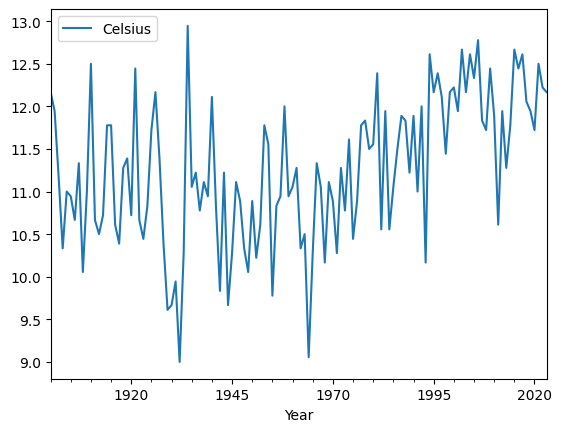

In [5]:
## Plotting the temperatures
temp.index= pd.to_datetime(temp.index, format= '%Y')

temp.plot()

The temperature plot seems to have some drift

#### Augmented Dickey Fuller Test

In [6]:
## Augmented Dickey Fuller Test for stationarity
adfuller(temp['Celsius'])

(np.float64(-4.8275594616918704),
 np.float64(4.815458159040318e-05),
 1,
 122,
 {'1%': np.float64(-3.4851223522012855),
  '5%': np.float64(-2.88553750045158),
  '10%': np.float64(-2.5795685622144586)},
 np.float64(255.54881201499262))

- Test statistic is smaller than critical values (at 1%, 5% and 10% level of significance)
- p-value is less than 1%, 5% and 10% significance levels
- Null hypothesis that the series is a non-stationary random walk is rejected 

#### Comparing ACF & PACF

(np.float64(-5.500686569913871), np.float64(2.074621158109397e-06), 11, 111, {'1%': np.float64(-3.490683082754047), '5%': np.float64(-2.8879516565798817), '10%': np.float64(-2.5808574442009578)}, np.float64(253.39331022590005))


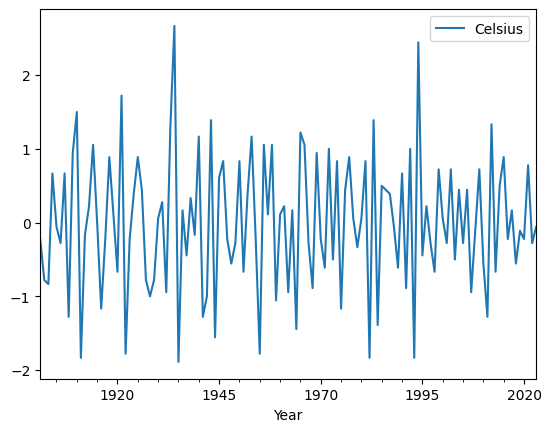

In [7]:
## First we difference to ensure strict stationarity
tempDiff= temp.diff()
tempDiff= tempDiff.dropna()

tempDiff.plot()
 # The 'drift' evident in the initial temperature plot is gone

print(adfuller(tempDiff['Celsius']))
 # Notice lower test statistics and p-value

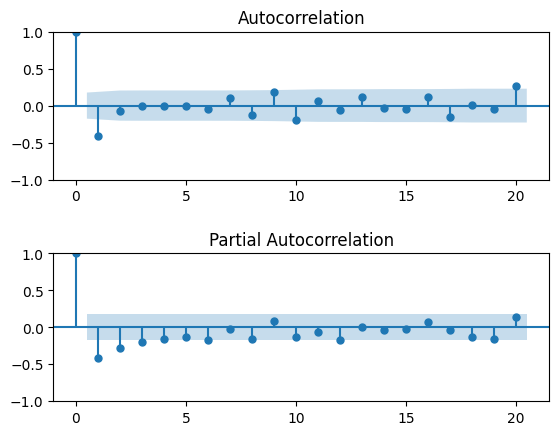

In [8]:
## ACF and PACF
fig, axes= plt.subplots(2,1)

plot_acf(tempDiff, lags= 20, ax=axes[0]) # ACF
plot_pacf(tempDiff, lags= 20, ax=axes[1]) # PACF

fig.subplots_adjust(hspace= 0.5)

#### The Best ARIMA Model?
Will be done using the AIC that checks goodness of fit for the number of parameters. The lower the AIC the better.

In [10]:
## Testing fitting (ARMA (1,1))
ar1= ARIMA(tempDiff, order= (1,0,1))
result_ar1= ar1.fit()

print(result_ar1.aic)

277.0030379455083


In [34]:
## The best model (between order 1 and 5)
best_aic= float('inf') # A very large initial value for AIC

for p in range(1, 10):
    for q in range(1, 10):
            # Fit a model with various orders
            model= ARIMA(temp, order=(p,1,q)) # d=1 in order to difference the data and ensure strict stationarity
            result= model.fit()

         # Check for the lowest AIC
            if result.aic < best_aic:
                best_aic= result.aic
                best_order= (p, 1, r)
                best_model= result # For further analysis when needed

print(f'best ARIMA Model Order: {best_order}')
print(f'Lowest AIC: {best_aic}')

best ARIMA Model Order: (3, 1, 4)
Lowest AIC: 275.2231585405075


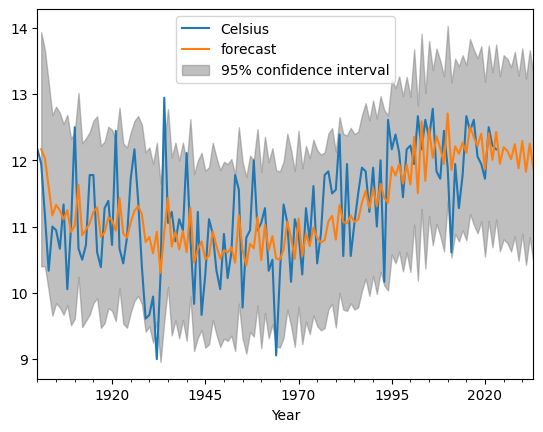

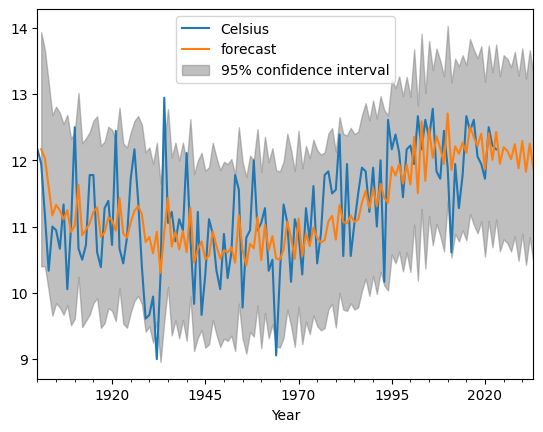

In [36]:
## Forecasting using ARIMA(4,3,2)
fig, ax= plt.subplots()
temp.plot(ax=ax)
plot_predict(best_model, start= '1901-01-01', end='2033-01-01', ax=ax)
 # We used the model with lowest AIC to forecast temperatures 7 years into the future 

The model despite having a low AIC (good fit), it fails to capture the underlying patters in temperature. We can remove the differencin

In [17]:
best_model.aic

np.float64(14.0)